In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hello = '/content/drive/MyDrive/Sachin-Tendulkar-All-International-Cricket-Centuries.csv'
df = pd.read_csv(hello)
df

,No.,Score,Against,Position,Innings,Venue,Ground,Date,Result
0,1,119*,England,6,4,"Old Trafford, Manchester",Away,09-Aug-90,Drawn
1,2,148*,Australia,6,2,"Sydney Cricket Ground, Sydney",Away,02-Jan-92,Drawn
2,3,114,Australia,4,2,"WACA Ground, Perth",Away,01-Feb-92,Lost
3,4,111,South Africa,4,2,"Wanderers Stadium, Johannesburg",Away,26-Nov-92,Drawn
4,5,165,England,4,1,"M. A. Chidambaram Stadium, Chennai",Home,11-Feb-93,Won
...,...,...,...,...,...,...,...,...,...
95,96,111*,South Africa,5,3,"SuperSport Park, Centurion",Away,16-Dec-10,Lost
96,97,146,South Africa,4,2,"Newlands Cricket Ground, Cape Town",Away,02-Jan-11,Drawn
97,98,120,England,2,1,"M. Chinnaswamy Stadium, Bangalore",Home,27-Feb-11,Tied
98,99,111,South Africa,2,1,"VCA Stadium, Nagpur",Home,12-Mar-11,Lost


In [ ]:
df['Result'] = df['Result'].replace({'Tied' : 'Draw ','Drawn' : 'Draw'})


<ipython-input-5-56504fef8c8c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')


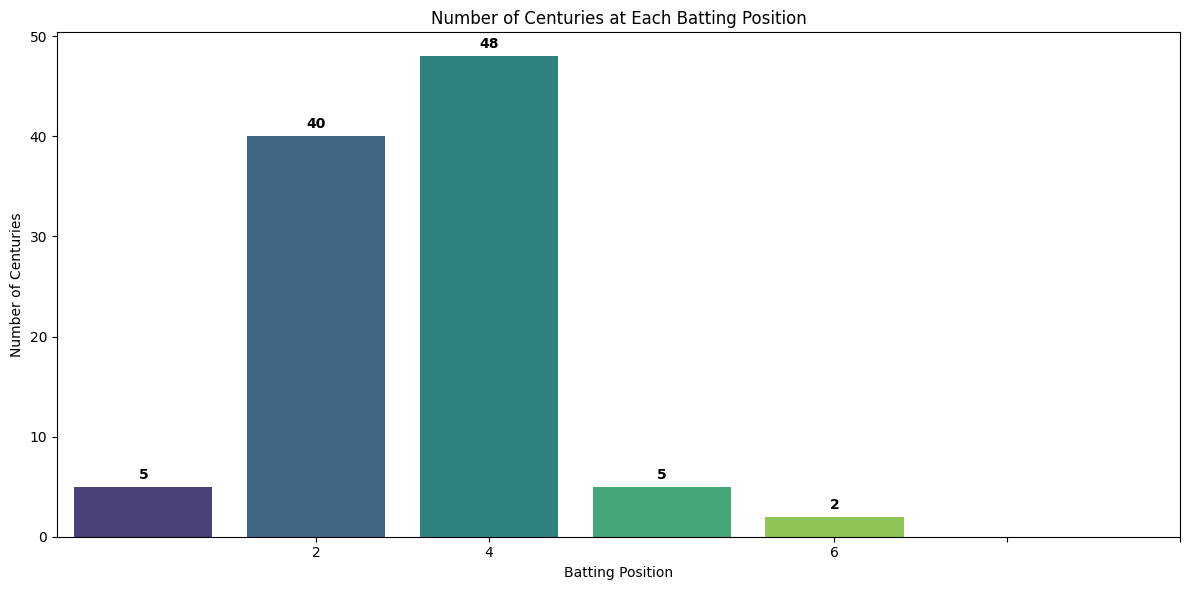

In [ ]:
# Count centuries at each batting position
position_counts = df['Position'].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')

plt.title("Number of Centuries at Each Batting Position")
plt.xlabel("Batting Position")
plt.ylabel("Number of Centuries")
plt.xticks(position_counts.index)

# Add value labels on top of each bar
for index, value in enumerate(position_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
team_centuries = df['Against'].value_counts().sort_index()

<ipython-input-7-38b5695258fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=team_centuries.index, y=team_centuries.values , palette='viridis')


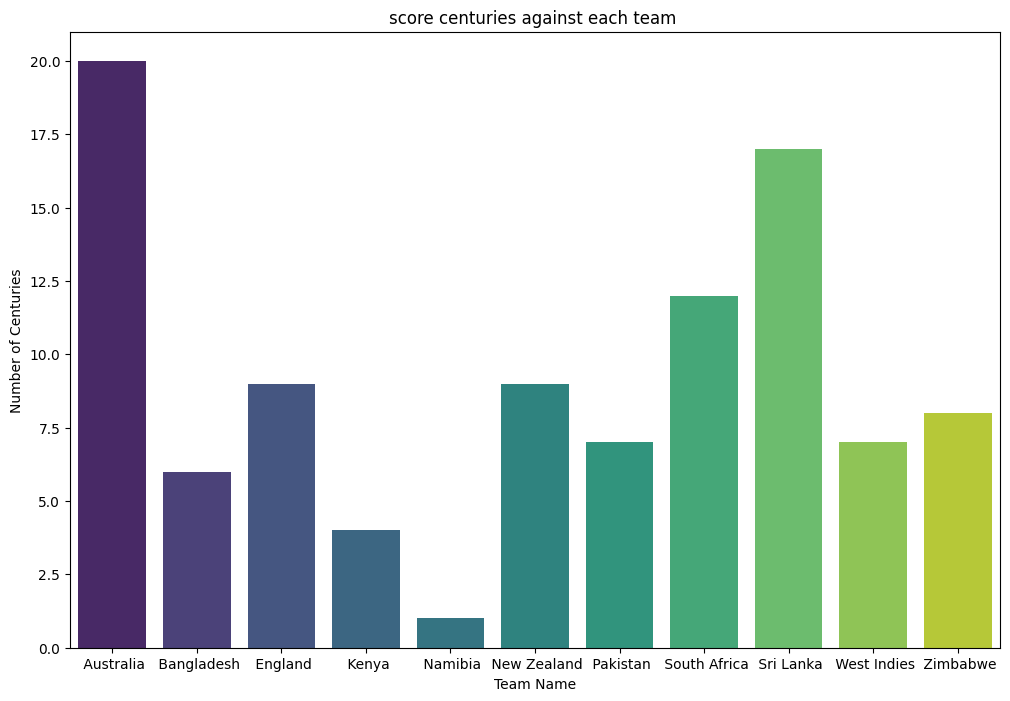

In [ ]:
plt.figure(figsize=(12 ,8))
bars = sns.barplot(x=team_centuries.index, y=team_centuries.values , palette='viridis')

plt.title("Scored centuries against different team ")
plt.xlabel('Team Name')
plt.ylabel('Number of Centuries')

plt.show()


In [ ]:
Ground_centuries = df['Ground'].value_counts().sort_index()


<ipython-input-9-786a9db3d6ce>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=Ground_centuries.index, y=Ground_centuries.values, palette ='viridis')


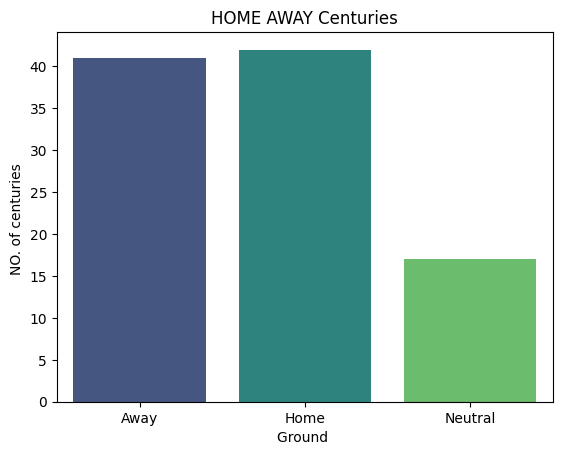

In [ ]:
bars = sns.barplot(x=Ground_centuries.index, y=Ground_centuries.values, palette ='viridis')
plt.title('HOME AWAY Centuries')
plt.xlabel('Ground ')
plt.ylabel('NO. of centuries ')

plt.show()


In [ ]:
After_result = df['Result'].value_counts().sort_index()

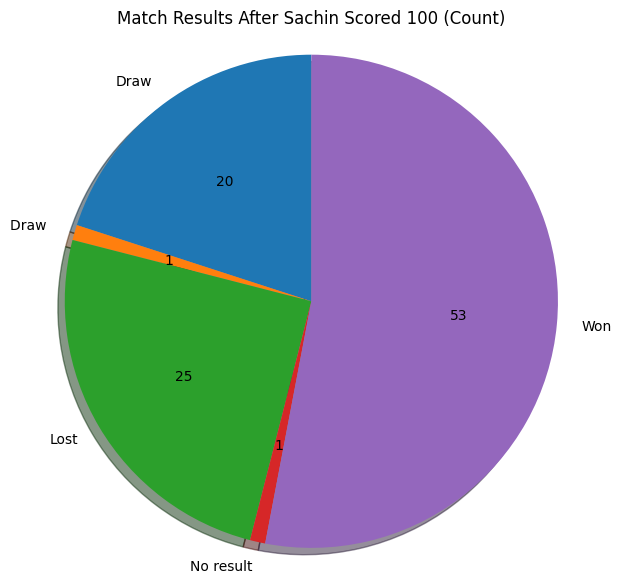

In [ ]:
import matplotlib.pyplot as plt

# Count of match results after Sachin scores 100
After_result = df['Result'].value_counts().sort_index()

# Function to show actual numbers on pie chart
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        count = int(round(pct * total / 100.0))
        return f'{count}'
    return my_autopct

# Plot
plt.figure(figsize=(7,7))
plt.pie(After_result, labels=After_result.index, autopct=make_autopct(After_result),
        startangle=90, shadow=True)
plt.title("Match Results After Sachin Scored 100 (Count)")
plt.axis('equal')
plt.show()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce')
df['year'] = df['Date'].dt.year
centuries_per_year = df['year'].value_counts().sort_index()
print(centuries_per_year)

year
1990     1
1992     3
1993     2
1994     5
1995     1
1996     8
1997     6
1998    12
1999     8
2000     5
2001     7
2002     6
2003     3
2004     4
2005     2
2006     2
2007     3
2008     5
2009     5
2010     8
2011     3
2012     1
Name: count, dtype: int64


<ipython-input-12-0f0c8aa3561a>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors= 'coerce')


<ipython-input-13-ccc51a34d85f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=centuries_per_year.index, y=centuries_per_year.values, palette='viridis')


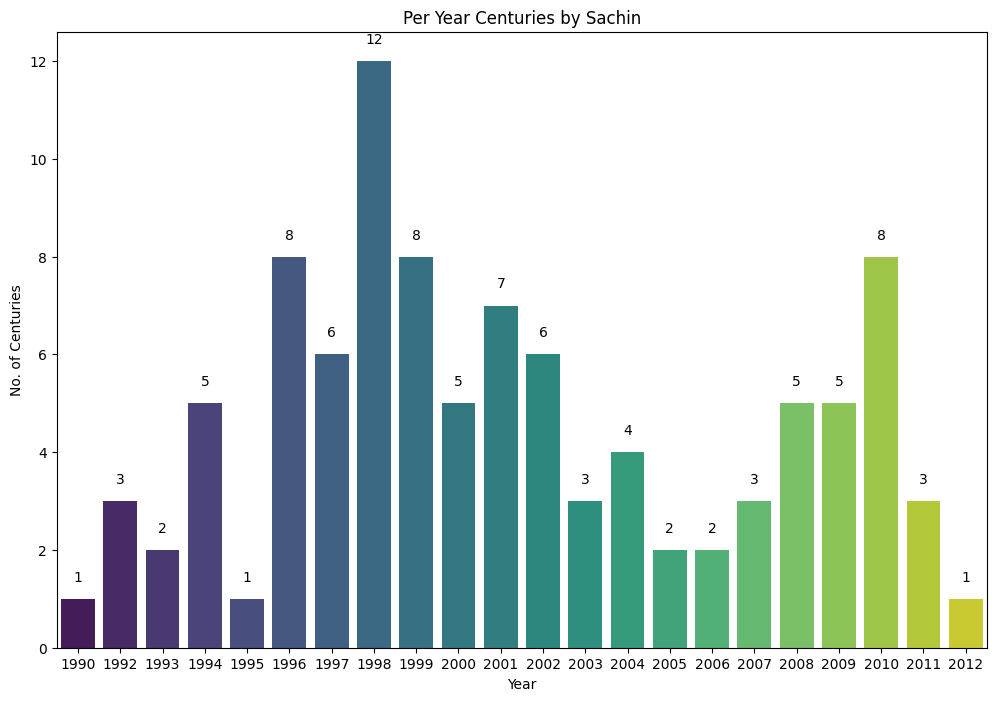

In [ ]:
plt.figure(figsize=(12, 8))
bars = sns.barplot(x=centuries_per_year.index, y=centuries_per_year.values, palette='viridis')

plt.title("Per Year Centuries by Sachin")
plt.xlabel("Year")
plt.ylabel("No. of Centuries")

# Add number labels
for i, value in enumerate(centuries_per_year.values):
    plt.text(i, value + 0.3, str(value), ha='center', va='bottom', fontsize=10)

plt.show()